##### Installing Packages

In [3]:
# Installing conda packages
!conda install -c conda-forge googlemaps #For geo coordinates
!conda install -c conda-forge folium


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - googlemaps


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    googlemaps-2.5.1           |             py_0          23 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    googlemaps:      2.5.1-py_0        conda-forge

The following packages will be UPDATED:

    ca-certificates: 2019.11.27-0                  --> 2019.11.28-hecc5488_0 conda-forge
    certifi:         2019.11.28-py36_0    

In [4]:
##Importing necessary packages

# For data handling
import numpy as np
import pandas as pd 

#For extracting HTML information from URL
import requests
from bs4 import BeautifulSoup

#For Clustering
from sklearn.cluster import KMeans

#For Visulization
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import folium

#For Geo-Coordinates
from googlemaps import Client as GoogleMaps
from geopy.geocoders import Nominatim


In [5]:
##Url to San Francisco Neighborhood Wiki Page

url = 'https://en.wikipedia.org/wiki/List_of_neighborhoods_in_San_Francisco'

results_url = requests.get(url).text


In [6]:
#Creating soup object to extract HTML information

soup = BeautifulSoup(results_url, 'lxml' )
# print(soup.prettify())

In [7]:
#Initiating an empty neighborhood list and populating it

neighborhoods = []
for text in soup.find_all('span', class_='mw-headline'):
    neighborhoods.append(text.text)

neighborhoods = neighborhoods[:-4]

print(neighborhoods)    

['Alamo Square', 'Anza Vista', 'Ashbury Heights', 'Balboa Park', 'Balboa Terrace', 'Bayview', 'Belden Place', 'Bernal Heights', 'Buena Vista', 'Butchertown (Old and New)', 'Castro', 'Cathedral Hill', 'Cayuga Terrace', 'China Basin', 'Chinatown', 'Civic Center', 'Clarendon Heights', 'Cole Valley', 'Corona Heights', 'Cow Hollow', 'Crocker-Amazon', 'Design District', 'Diamond Heights', 'Dogpatch', 'Dolores Heights', 'Duboce Triangle', 'Embarcadero', 'Eureka Valley', 'Excelsior', 'Fillmore', 'Financial District', 'Financial District South', "Fisherman's Wharf", 'Forest Hill', 'Forest Knolls', 'Glen Park', 'Golden Gate Heights', 'Haight-Ashbury', 'Hayes Valley', 'Hunters Point', 'India Basin', 'Ingleside', 'Ingleside Terraces', 'Inner Sunset', 'Irish Hill', 'Islais Creek', 'Jackson Square', 'Japantown', 'Jordan Park', 'Laguna Honda', 'Lake Street', 'Lakeside', 'Lakeshore', 'Laurel Heights', 'Lincoln Manor', 'Little Hollywood', 'Little Russia', 'Little Saigon', 'Lone Mountain', 'Lower Haight

In [8]:
#Creating a df from the extracted neighborhood list

df  = pd.DataFrame(data=[neighborhoods]).T
df.columns = ['Neighborhood']
df.head()

,Neighborhood
0,Alamo Square
1,Anza Vista
2,Ashbury Heights
3,Balboa Park
4,Balboa Terrace


In [9]:
# The code was removed by Watson Studio for sharing.

In [10]:
#Adding lat & long columns to data frame

df['lat'] = ""
df['long']=""

#Creating an Address Column

df['Address'] = df['Neighborhood'].astype(str) + ', San Francisco'
df.head()

,Neighborhood,lat,long,Address
0,Alamo Square,,,"Alamo Square, San Francisco"
1,Anza Vista,,,"Anza Vista, San Francisco"
2,Ashbury Heights,,,"Ashbury Heights, San Francisco"
3,Balboa Park,,,"Balboa Park, San Francisco"
4,Balboa Terrace,,,"Balboa Terrace, San Francisco"


In [11]:
#Populate Latitude & Longitude from Google Maps API

for x in range(len(df)):
    geocode_result = gmaps.geocode(df['Address'][x])
    df['lat'][x] = geocode_result[0]['geometry']['location'] ['lat']
    df['long'][x] = geocode_result[0]['geometry']['location']['lng']
    
df.head()

,Neighborhood,lat,long,Address
0,Alamo Square,37.7775,-122.433,"Alamo Square, San Francisco"
1,Anza Vista,37.7809,-122.443,"Anza Vista, San Francisco"
2,Ashbury Heights,37.7653,-122.445,"Ashbury Heights, San Francisco"
3,Balboa Park,37.7246,-122.443,"Balboa Park, San Francisco"
4,Balboa Terrace,37.7313,-122.469,"Balboa Terrace, San Francisco"


In [12]:
#Export to CSV

df.to_csv('SanFranNeighborhood.csv')

##### San Francisco map

In [116]:
#Get Coordinates for San Francisco 

address = 'San Francisco, California'

geolocator = Nominatim(user_agent="sanfran_details")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print("The longitude is {} and the latitude is {}".format(longitude, latitude))

The longitude is -122.4192363 and the latitude is 37.7792808


In [117]:
#Create Map

sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 10)

for lat, long,neighborhood in zip(df['lat'], df['long'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat,long],
        radius = 5,
        popup = label,
        color = 'green',
        fill= True,
        fill_opacity = 0.5,
        parse_html = False).add_to(sanfran_map)
sanfran_map


##### Set up FourSqaure credentials

In [15]:
# The code was removed by Watson Studio for sharing.

In [16]:
#Declare global variables


limit = 500
radiustoexplore = 500

In [17]:
def getNearbyVenues(neighborhood, latitudes, longitudes, radius=radiustoexplore):
    
    venues_list=[]
    for neighborhood, lat, lng in zip(neighborhood, latitudes, longitudes):
        print(neighborhood)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        for v in results:
            
            venues_list.append((
                neighborhood, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']))

    nearby_venues = pd.DataFrame(venues_list)
    
    return(nearby_venues)

In [18]:

sanfran_venues = getNearbyVenues(  neighborhood=df['Neighborhood'],
                                   latitudes=df['lat'],
                                   longitudes=df['long']
                                  )


Alamo Square
Anza Vista
Ashbury Heights
Balboa Park
Balboa Terrace
Bayview
Belden Place
Bernal Heights
Buena Vista
Butchertown (Old and New)
Castro
Cathedral Hill
Cayuga Terrace
China Basin
Chinatown
Civic Center
Clarendon Heights
Cole Valley
Corona Heights
Cow Hollow
Crocker-Amazon
Design District
Diamond Heights
Dogpatch
Dolores Heights
Duboce Triangle
Embarcadero
Eureka Valley
Excelsior
Fillmore
Financial District
Financial District South
Fisherman's Wharf
Forest Hill
Forest Knolls
Glen Park
Golden Gate Heights
Haight-Ashbury
Hayes Valley
Hunters Point
India Basin
Ingleside
Ingleside Terraces
Inner Sunset
Irish Hill
Islais Creek
Jackson Square
Japantown
Jordan Park
Laguna Honda
Lake Street
Lakeside
Lakeshore
Laurel Heights
Lincoln Manor
Little Hollywood
Little Russia
Little Saigon
Lone Mountain
Lower Haight
Lower Pacific Heights
Lower Nob Hill
Marina District
Merced Heights
Merced Manor
Midtown Terrace
Mid-Market
Miraloma Park
Mission Bay
Mission District
Mission Dolores
Mission Ter

In [19]:
sanfran_venues
sanfran_venues.columns = ['Neighborhood', 'NeighborhoodLatitude', 'NeighborhoodLongitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']
sanfran_venues

,Neighborhood,NeighborhoodLatitude,NeighborhoodLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Alamo Square,37.777499,-122.433252,Alamo Square,37.776143,-122.434269,Park
1,Alamo Square,37.777499,-122.433252,Painted Ladies,37.776120,-122.433389,Historic Site
2,Alamo Square,37.777499,-122.433252,Alamo Square Dog Park,37.775878,-122.435740,Dog Run
3,Alamo Square,37.777499,-122.433252,Originals Vinyl,37.775835,-122.431227,Record Shop
4,Alamo Square,37.777499,-122.433252,Church of 8 Wheels,37.774733,-122.430862,Roller Rink
5,Alamo Square,37.777499,-122.433252,The Center SF,37.774545,-122.430730,Spiritual Center
6,Alamo Square,37.777499,-122.433252,Kebab King,37.779786,-122.431589,Pakistani Restaurant
7,Alamo Square,37.777499,-122.433252,Folklores Coffee Roastery & Cafe,37.778924,-122.432738,Coffee Shop
8,Alamo Square,37.777499,-122.433252,The Mill,37.776425,-122.437970,Bakery
9,Alamo Square,37.777499,-122.433252,Boba Guys,37.777440,-122.438191,Bubble Tea Shop


In [20]:
# #Explore 

placetoexplore = 'Restaurant'

print('There are ',len(sanfran_venues['VenueCategory'].unique()),' venue categories around San Francisco')

#How many restaturant categories 

uniquerestaurants = sanfran_venues[sanfran_venues['VenueCategory'].str.contains('{}'.format(placetoexplore))]['VenueCategory'].unique().tolist()

print('There are', len(uniquerestaurants), ' unique restaurants in SF area')
uniquerestaurants

##Explore Other Categories

sanfran_venues['VenueCategory'].unique()

##Create a df for restaurants

restaurantdf = sanfran_venues[sanfran_venues['VenueCategory'].str.contains('{}'.format(placetoexplore))]
restaurantdf.head()

There are  360  venue categories around San Francisco
There are 65  unique restaurants in SF area


,Neighborhood,NeighborhoodLatitude,NeighborhoodLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
6,Alamo Square,37.777499,-122.433252,Kebab King,37.779786,-122.431589,Pakistani Restaurant
15,Alamo Square,37.777499,-122.433252,Bar Crudo,37.775707,-122.438019,Seafood Restaurant
17,Alamo Square,37.777499,-122.433252,Nopa,37.774971,-122.437716,New American Restaurant
18,Alamo Square,37.777499,-122.433252,Brenda's Meat & Three,37.778265,-122.438584,Southern / Soul Food Restaurant
22,Alamo Square,37.777499,-122.433252,jū-ni,37.776743,-122.438770,Sushi Restaurant


In [21]:
#Encode VenueCategory column

sfrestaurant_onehot = pd.get_dummies(restaurantdf[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sfrestaurant_onehot['Neighborhood'] = restaurantdf['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [sfrestaurant_onehot.columns[-1]] + list(sfrestaurant_onehot.columns[:-1])
sfrestaurant_onehot = sfrestaurant_onehot[fixed_columns]

sfrestaurant_onehot.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Austrian Restaurant,Brazilian Restaurant,Burmese Restaurant,Cantonese Restaurant,...,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Tuscan Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
6,Alamo Square,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,Alamo Square,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,Alamo Square,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,Alamo Square,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,Alamo Square,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [22]:
sfrestaurant_grouped = sfrestaurant_onehot.groupby('Neighborhood').mean().reset_index()
sfrestaurant_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Austrian Restaurant,Brazilian Restaurant,Burmese Restaurant,Cantonese Restaurant,...,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Tuscan Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Alamo Square,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Anza Vista,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Ashbury Heights,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Balboa Terrace,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.142857,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857
4,Belden Place,0.000000,0.0,0.074074,0.000000,0.037037,0.0,0.000000,0.000000,0.037037,...,0.074074,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000
5,Bernal Heights,0.000000,0.0,0.000000,0.000000,0.111111,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Buena Vista,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.142857,0.000000,0.142857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Butchertown (Old and New),0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Castro,0.000000,0.0,0.045455,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.045455,0.045455,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000
9,Cathedral Hill,0.052632,0.0,0.052632,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.263158,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
sfrestaurant_grouped.shape

(96, 66)

In [24]:
num_top_venues = 5

for hood in sfrestaurant_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = sfrestaurant_grouped[sfrestaurant_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alamo Square----
                     venue  freq
0       Seafood Restaurant  0.13
1         Sushi Restaurant  0.13
2        Indian Restaurant  0.13
3  New American Restaurant  0.07
4     Pakistani Restaurant  0.07


----Anza Vista----
                             venue  freq
0               Mexican Restaurant   0.5
1  Southern / Soul Food Restaurant   0.5
2                Afghan Restaurant   0.0
3          Scandinavian Restaurant   0.0
4         Mediterranean Restaurant   0.0


----Ashbury Heights----
                       venue  freq
0         Italian Restaurant  0.33
1           Sushi Restaurant  0.17
2         Mexican Restaurant  0.17
3  Middle Eastern Restaurant  0.17
4                 Restaurant  0.17


----Balboa Terrace----
                venue  freq
0   Korean Restaurant  0.14
1  Italian Restaurant  0.14
2     Thai Restaurant  0.14
3    Sushi Restaurant  0.14
4          Restaurant  0.14


----Belden Place----
                 venue  freq
0    French Restaurant  0.07
1   

In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']



In [87]:
# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sfrestaurant_grouped['Neighborhood']

for ind in np.arange(sfrestaurant_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sfrestaurant_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alamo Square,Sushi Restaurant,Indian Restaurant,Seafood Restaurant,Italian Restaurant,Pakistani Restaurant,New American Restaurant,Southern / Soul Food Restaurant,Ethiopian Restaurant,Spanish Restaurant,Mediterranean Restaurant
1,Anza Vista,Mexican Restaurant,Southern / Soul Food Restaurant,Vietnamese Restaurant,Hawaiian Restaurant,Filipino Restaurant,Fondue Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Hotpot Restaurant
2,Ashbury Heights,Italian Restaurant,Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Sushi Restaurant,Greek Restaurant,Filipino Restaurant,Fondue Restaurant,French Restaurant,German Restaurant
3,Balboa Terrace,Vietnamese Restaurant,Sushi Restaurant,Italian Restaurant,Japanese Restaurant,Restaurant,Korean Restaurant,Thai Restaurant,Tapas Restaurant,Empanada Restaurant,Udon Restaurant
4,Belden Place,Restaurant,American Restaurant,Japanese Restaurant,French Restaurant,Sushi Restaurant,New American Restaurant,Dim Sum Restaurant,Seafood Restaurant,Japanese Curry Restaurant,Latin American Restaurant


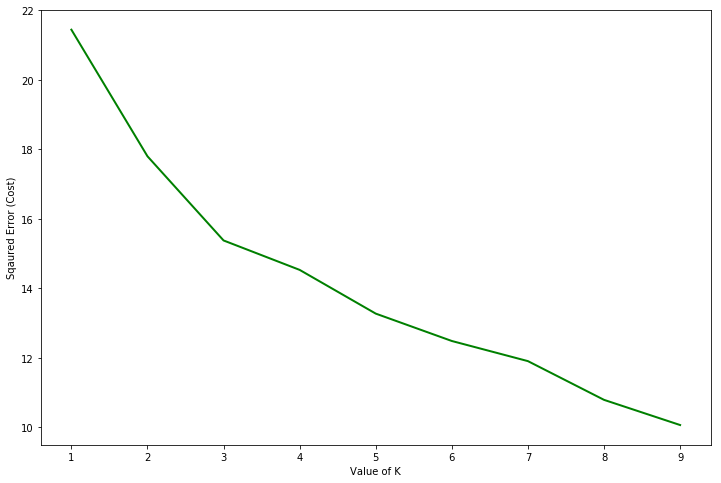

In [36]:
##Choosing the best value of K for Kmeans clustering 
sfrestaurant_grouped_clustering = sfrestaurant_grouped.drop('Neighborhood', 1)

cost =[] 
for i in range(1,10): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(sfrestaurant_grouped_clustering) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)   
    
# plot the cost against K values 
plt.figure(figsize= (12,8))
plt.plot(range(1, 10), cost, color ='g', linewidth ='2') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 



##### K=5 is the elbow point for inertia metric graph. The cluster size is set to 5

In [88]:
#Clustering

# set number of clusters
clusters = 5

sfrestaurant_grouped_clustering = sfrestaurant_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=clusters, random_state=0).fit(sfrestaurant_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 4, 0, 0, 4, 0, 1, 4, 0], dtype=int32)

In [89]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sanfran_merged = restaurantdf

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
sanfran_merged = sanfran_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

sanfran_merged.head() # check the last columns!

,Neighborhood,NeighborhoodLatitude,NeighborhoodLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Alamo Square,37.777499,-122.433252,Kebab King,37.779786,-122.431589,Pakistani Restaurant,0,Sushi Restaurant,Indian Restaurant,Seafood Restaurant,Italian Restaurant,Pakistani Restaurant,New American Restaurant,Southern / Soul Food Restaurant,Ethiopian Restaurant,Spanish Restaurant,Mediterranean Restaurant
15,Alamo Square,37.777499,-122.433252,Bar Crudo,37.775707,-122.438019,Seafood Restaurant,0,Sushi Restaurant,Indian Restaurant,Seafood Restaurant,Italian Restaurant,Pakistani Restaurant,New American Restaurant,Southern / Soul Food Restaurant,Ethiopian Restaurant,Spanish Restaurant,Mediterranean Restaurant
17,Alamo Square,37.777499,-122.433252,Nopa,37.774971,-122.437716,New American Restaurant,0,Sushi Restaurant,Indian Restaurant,Seafood Restaurant,Italian Restaurant,Pakistani Restaurant,New American Restaurant,Southern / Soul Food Restaurant,Ethiopian Restaurant,Spanish Restaurant,Mediterranean Restaurant
18,Alamo Square,37.777499,-122.433252,Brenda's Meat & Three,37.778265,-122.438584,Southern / Soul Food Restaurant,0,Sushi Restaurant,Indian Restaurant,Seafood Restaurant,Italian Restaurant,Pakistani Restaurant,New American Restaurant,Southern / Soul Food Restaurant,Ethiopian Restaurant,Spanish Restaurant,Mediterranean Restaurant
22,Alamo Square,37.777499,-122.433252,jū-ni,37.776743,-122.438770,Sushi Restaurant,0,Sushi Restaurant,Indian Restaurant,Seafood Restaurant,Italian Restaurant,Pakistani Restaurant,New American Restaurant,Southern / Soul Food Restaurant,Ethiopian Restaurant,Spanish Restaurant,Mediterranean Restaurant


In [90]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(clusters)
ys = [i + x + (i*x)**2 for i in range(clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sanfran_merged['NeighborhoodLatitude'], sanfran_merged['NeighborhoodLongitude'], sanfran_merged['Neighborhood'], sanfran_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

#### Examine Clusters

In [122]:
#Cluster 1

sanfran_merged.loc[sanfran_merged['Cluster Labels'] == 0, sanfran_merged.columns[[0] + list(range(5, sanfran_merged.shape[1]))]]

,Neighborhood,VenueLongitude,VenueCategory,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Alamo Square,-122.431589,Pakistani Restaurant,0,Sushi Restaurant,Indian Restaurant,Seafood Restaurant,Italian Restaurant,Pakistani Restaurant,New American Restaurant,Southern / Soul Food Restaurant,Ethiopian Restaurant,Spanish Restaurant,Mediterranean Restaurant
15,Alamo Square,-122.438019,Seafood Restaurant,0,Sushi Restaurant,Indian Restaurant,Seafood Restaurant,Italian Restaurant,Pakistani Restaurant,New American Restaurant,Southern / Soul Food Restaurant,Ethiopian Restaurant,Spanish Restaurant,Mediterranean Restaurant
17,Alamo Square,-122.437716,New American Restaurant,0,Sushi Restaurant,Indian Restaurant,Seafood Restaurant,Italian Restaurant,Pakistani Restaurant,New American Restaurant,Southern / Soul Food Restaurant,Ethiopian Restaurant,Spanish Restaurant,Mediterranean Restaurant
18,Alamo Square,-122.438584,Southern / Soul Food Restaurant,0,Sushi Restaurant,Indian Restaurant,Seafood Restaurant,Italian Restaurant,Pakistani Restaurant,New American Restaurant,Southern / Soul Food Restaurant,Ethiopian Restaurant,Spanish Restaurant,Mediterranean Restaurant
22,Alamo Square,-122.438770,Sushi Restaurant,0,Sushi Restaurant,Indian Restaurant,Seafood Restaurant,Italian Restaurant,Pakistani Restaurant,New American Restaurant,Southern / Soul Food Restaurant,Ethiopian Restaurant,Spanish Restaurant,Mediterranean Restaurant
25,Alamo Square,-122.438149,Italian Restaurant,0,Sushi Restaurant,Indian Restaurant,Seafood Restaurant,Italian Restaurant,Pakistani Restaurant,New American Restaurant,Southern / Soul Food Restaurant,Ethiopian Restaurant,Spanish Restaurant,Mediterranean Restaurant
27,Alamo Square,-122.438486,Sushi Restaurant,0,Sushi Restaurant,Indian Restaurant,Seafood Restaurant,Italian Restaurant,Pakistani Restaurant,New American Restaurant,Southern / Soul Food Restaurant,Ethiopian Restaurant,Spanish Restaurant,Mediterranean Restaurant
32,Alamo Square,-122.437896,Mediterranean Restaurant,0,Sushi Restaurant,Indian Restaurant,Seafood Restaurant,Italian Restaurant,Pakistani Restaurant,New American Restaurant,Southern / Soul Food Restaurant,Ethiopian Restaurant,Spanish Restaurant,Mediterranean Restaurant
33,Alamo Square,-122.431501,Seafood Restaurant,0,Sushi Restaurant,Indian Restaurant,Seafood Restaurant,Italian Restaurant,Pakistani Restaurant,New American Restaurant,Southern / Soul Food Restaurant,Ethiopian Restaurant,Spanish Restaurant,Mediterranean Restaurant
35,Alamo Square,-122.438698,Hunan Restaurant,0,Sushi Restaurant,Indian Restaurant,Seafood Restaurant,Italian Restaurant,Pakistani Restaurant,New American Restaurant,Southern / Soul Food Restaurant,Ethiopian Restaurant,Spanish Restaurant,Mediterranean Restaurant


In [110]:
#Cluster 2

sanfran_merged.loc[sanfran_merged['Cluster Labels'] == 1, sanfran_merged.columns[[0] + list(range(5, sanfran_merged.shape[1]))]]['Neighborhood'].unique().tolist()

['Anza Vista',
 'Butchertown (Old and New)',
 'Merced Heights',
 'Parkmerced',
 'Parnassus',
 'Portola Place',
 'Silver Terrace']

In [119]:
#Cluster 3

sanfran_merged.loc[sanfran_merged['Cluster Labels'] == 2, sanfran_merged.columns[[0] + list(range(5, sanfran_merged.shape[1]))]]

,Neighborhood,VenueLongitude,VenueCategory,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4893,Sunnydale,-122.417830,Asian Restaurant,2,Asian Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Jewish Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indian Restaurant,Hunan Restaurant,Hotpot Restaurant
4897,Sunnydale,-122.417296,Asian Restaurant,2,Asian Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Jewish Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indian Restaurant,Hunan Restaurant,Hotpot Restaurant


In [120]:
#Cluster 4 
sanfran_merged.loc[sanfran_merged['Cluster Labels'] == 3, sanfran_merged.columns[[0] + list(range(5, sanfran_merged.shape[1]))]]

,Neighborhood,VenueLongitude,VenueCategory,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2484,Lakeshore,-122.493770,American Restaurant,3,American Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Jewish Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indian Restaurant,Hunan Restaurant,Hotpot Restaurant
2635,Little Hollywood,-122.393320,American Restaurant,3,American Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Jewish Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indian Restaurant,Hunan Restaurant,Hotpot Restaurant
5128,Treasure Island,-122.375594,American Restaurant,3,American Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Jewish Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indian Restaurant,Hunan Restaurant,Hotpot Restaurant
5281,Vista del Mar,-122.509552,American Restaurant,3,American Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Jewish Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indian Restaurant,Hunan Restaurant,Hotpot Restaurant


In [121]:
#Cluster 5 
sanfran_merged.loc[sanfran_merged['Cluster Labels'] == 4, sanfran_merged.columns[[0] + list(range(5, sanfran_merged.shape[1]))]]

,Neighborhood,VenueLongitude,VenueCategory,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
90,Ashbury Heights,-122.450065,Mexican Restaurant,4,Italian Restaurant,Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Sushi Restaurant,Greek Restaurant,Filipino Restaurant,Fondue Restaurant,French Restaurant,German Restaurant
104,Ashbury Heights,-122.449909,Restaurant,4,Italian Restaurant,Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Sushi Restaurant,Greek Restaurant,Filipino Restaurant,Fondue Restaurant,French Restaurant,German Restaurant
105,Ashbury Heights,-122.449969,Italian Restaurant,4,Italian Restaurant,Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Sushi Restaurant,Greek Restaurant,Filipino Restaurant,Fondue Restaurant,French Restaurant,German Restaurant
113,Ashbury Heights,-122.449978,Sushi Restaurant,4,Italian Restaurant,Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Sushi Restaurant,Greek Restaurant,Filipino Restaurant,Fondue Restaurant,French Restaurant,German Restaurant
119,Ashbury Heights,-122.445134,Italian Restaurant,4,Italian Restaurant,Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Sushi Restaurant,Greek Restaurant,Filipino Restaurant,Fondue Restaurant,French Restaurant,German Restaurant
120,Ashbury Heights,-122.449755,Middle Eastern Restaurant,4,Italian Restaurant,Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Sushi Restaurant,Greek Restaurant,Filipino Restaurant,Fondue Restaurant,French Restaurant,German Restaurant
257,Bernal Heights,-122.413895,Asian Restaurant,4,Italian Restaurant,Peruvian Restaurant,Asian Restaurant,Indian Restaurant,Mexican Restaurant,Hunan Restaurant,Caribbean Restaurant,New American Restaurant,Vietnamese Restaurant,Greek Restaurant
263,Bernal Heights,-122.414061,Peruvian Restaurant,4,Italian Restaurant,Peruvian Restaurant,Asian Restaurant,Indian Restaurant,Mexican Restaurant,Hunan Restaurant,Caribbean Restaurant,New American Restaurant,Vietnamese Restaurant,Greek Restaurant
264,Bernal Heights,-122.415343,Italian Restaurant,4,Italian Restaurant,Peruvian Restaurant,Asian Restaurant,Indian Restaurant,Mexican Restaurant,Hunan Restaurant,Caribbean Restaurant,New American Restaurant,Vietnamese Restaurant,Greek Restaurant
269,Bernal Heights,-122.417440,Italian Restaurant,4,Italian Restaurant,Peruvian Restaurant,Asian Restaurant,Indian Restaurant,Mexican Restaurant,Hunan Restaurant,Caribbean Restaurant,New American Restaurant,Vietnamese Restaurant,Greek Restaurant
